<a href="https://colab.research.google.com/github/CarlosCR07/Miner-a-de-Datos/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Carlos Castelan Ramos**
 - Práctica 3.1 - Aplicación de Clustering - DBSCAN

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("transacciones.csv", encoding='latin1')

In [4]:
# Supongamos que tienes dos columnas 'X' y 'Y' que deseas utilizar para clustering
X = data[['Antiguedad', 'Edad']]

In [5]:
# Escalar los datos para que tengan media 0 y varianza 1 (importante para DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Crear y ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar estos parámetros según tus necesidades
dbscan.fit(X_scaled)


DBSCAN()

In [7]:
# Agregar las etiquetas de clúster al DataFrame original
data['Cluster'] = dbscan.labels_

In [8]:
# Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

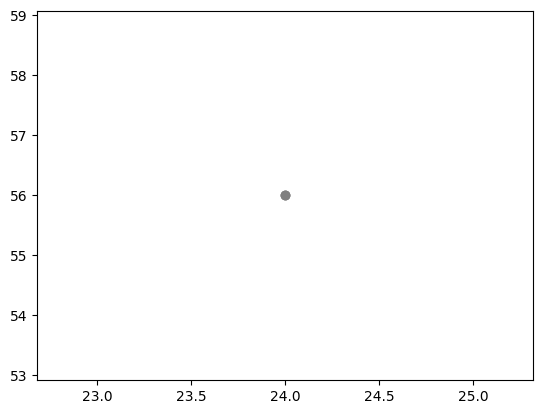

In [9]:
# Los puntos que no pertenecen a ningún clúster se etiquetan como ruido (-1)
plt.scatter(data[data['Cluster'] == -1]['Antiguedad'], data[data['Cluster'] == -1]['Edad'], color='gray', label='Ruido')


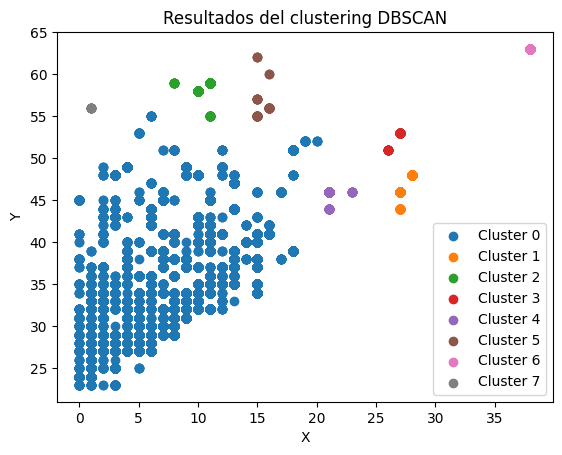

In [12]:
# Visualizar los clústeres
unique_clusters = set(dbscan.labels_)
for cluster in unique_clusters:
    if cluster != -1:  # Excluye el ruido
        cluster_data = data[data['Cluster'] == cluster]
        plt.scatter(cluster_data['Antiguedad'], cluster_data['Edad'], label=f'Cluster {cluster}')
        plt.xlabel('X')
plt.ylabel('Y')
plt.title('Resultados del clustering DBSCAN')
plt.legend()
plt.show()